# Adding the dataset
## Firstly, we try to import abalone dataset to work on it.

In [119]:
import pandas as pd
import numpy as np

## Lodaing the dataset. 

In [120]:
df = pd.read_csv('abalone.data.csv')

In [121]:
df.head(10)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


# We can add columns  header for dataset as the following way:

In [122]:
df.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']  

In [123]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.44,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


# We can drop specific columns in the following way:
## for instance here we delete Diameters, Shucked weight and Sex

In [124]:
to_drop = ['Diameter','Shucked weight']
df.drop(to_drop, inplace = True, axis = 1)

## when you check it you'll see unwanted ones have been removed

In [125]:
df.head(3)

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
0,M,0.35,0.090,0.2255,0.0485,0.070,7
1,F,0.53,0.135,0.6770,0.1415,0.210,9
2,M,0.44,0.125,0.5160,0.1140,0.155,10


# as provided here, there is a unique number for each column at first column which we can use it sometimes
## or we can opt for a list from it as follow

In [126]:
df.loc[1]

Sex                    F
Length              0.53
Height             0.135
Whole weight       0.677
Viscera weight    0.1415
Shell weight        0.21
Rings                  9
Name: 1, dtype: object

In [127]:
df.loc[:2]

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
0,M,0.35,0.090,0.2255,0.0485,0.070,7
1,F,0.53,0.135,0.6770,0.1415,0.210,9
2,M,0.44,0.125,0.5160,0.1140,0.155,10


In [128]:
df.loc[1:3]

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
1,F,0.53,0.135,0.677,0.1415,0.210,9
2,M,0.44,0.125,0.516,0.1140,0.155,10
3,I,0.33,0.080,0.205,0.0395,0.055,7


In [129]:
df.loc[2:,'Length'].head(5)

2    0.440
3    0.330
4    0.425
5    0.530
6    0.545
Name: Length, dtype: float64

In [130]:
regex = r'^(\d{4})'

In [131]:
extr = df['Sex'].str.extract(r'^(\d{4})', expand=False)

In [132]:
df.head(3)

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
0,M,0.35,0.090,0.2255,0.0485,0.070,7
1,F,0.53,0.135,0.6770,0.1415,0.210,9
2,M,0.44,0.125,0.5160,0.1140,0.155,10


## IO in pandas
### writeing custom data into a new file

In [133]:
df.to_csv('changed_abalone.csv')

### or you can just sent one column on new one.

In [134]:
df['Height'].to_csv('changed_abalone.csv') 


In [135]:
df = pd.read_csv('changed_abalone.csv',index_col=0)
print(df.head(5))

    0.09
0       
1  0.135
2  0.125
3  0.080
4  0.095
5  0.150


### if you want send the header with data to a new one do this:

In [136]:
df.to_csv('newcsv4.csv', header=True)

In [138]:
print(df.head())

    0.09
0       
1  0.135
2  0.125
3  0.080
4  0.095
5  0.150


### if you want to show data in HTML in your website do it as follow:

In [140]:
df.to_html('abalone.html')

 # Rename

### perhaps you just want to change one without having to type all the others out:

In [152]:
df = pd.read_csv('newcsv4.csv',names = ['Length'])
print(df.head(3))
df.rename(columns={'Length':'mLength'}, inplace=True)
print(df.head())

   Length
0   0.090
1   0.135
2   0.125
   mLength
0    0.090
1    0.135
2    0.125
3    0.080
4    0.095


## One of the most important usages of pandas is separate inputs and targets 
### here is a sample to how separate them from a csv file
### for example here, we want set Ring as target value as well as setting the rest as input data 

In [156]:
df = pd.read_csv('abalone.csv',skipinitialspace=True)
df.dropna(inplace=True)

x_train = df[['Sex','Length','Height','Viscera weight']]
#also we can add more ore less data to train

y_train = df[['Rings']]


### if you need too work with numpy array also you can do as follow:
### here we set Rings as y and the rest of them as x input.

In [157]:
X = np.array(df.drop(['Rings'], 1))
y = np.array(df['Rings'])

In [159]:
print(X)
print(y)

[['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ['M' 0.44 0.365 ... 0.2155 0.114 0.155]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.29600000000000004]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]
[ 7  9 10 ...  9 10 12]


# Plotting in pandas
### we use matplotlib.pyplot
#### it is just a simple wrapper around  plt.plot()

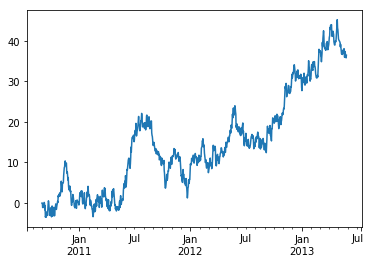

In [166]:
 import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('9/1/2010', periods=1000))
ts = ts.cumsum()
ts.plot()

### You can plot one column versus another using the x and y keywords in plot():

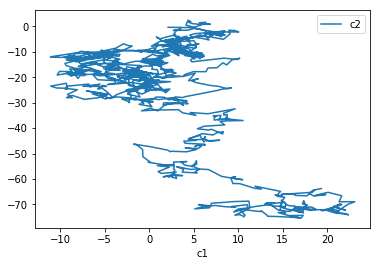

In [167]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['c1', 'c2']).cumsum()
df['c3'] = pd.Series(list(range(len(df))))
df.plot(x='c1', y='c2')

# other formats:
# Barcharts

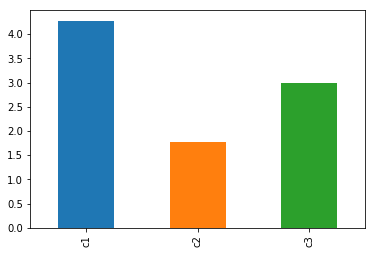

In [169]:
plt.figure();
df.iloc[3].plot(kind='bar');

### Calling a DataFrame’s plot.bar() method produces a multiple bar plot:

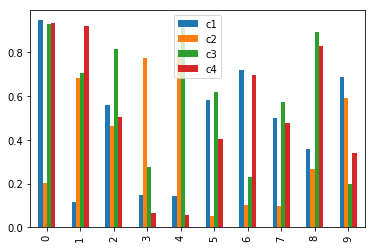

In [173]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['c1', 'c2', 'c3', 'c4'])
df.plot.bar();

## to create scatter pass stacked=True:

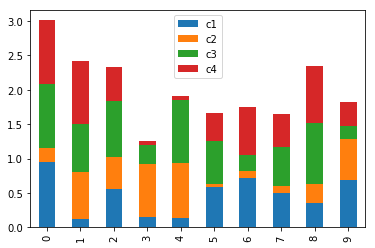

In [174]:
df.plot.bar(stacked=True);


# Box Plots
### used for distribution of values within each column.

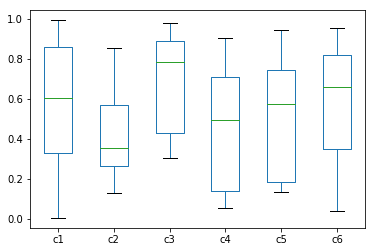

In [176]:
df = pd.DataFrame(np.random.rand(10, 6), columns=['c1', 'c2', 'c3', 'c4', 'c5','c6'])
df.plot.box()

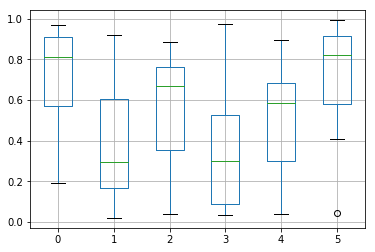

In [179]:
df = pd.DataFrame(np.random.rand(12,6))
plt.figure()
bp = df.boxplot()



# Histograms

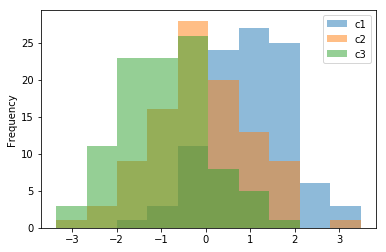

In [183]:
df = pd.DataFrame({'c1': np.random.randn(100) + 1, 'c2': np.random.randn(100),
                    'c3': np.random.randn(100) - 1}, columns=['c1', 'c2', 'c3'])
plt.figure();
df.plot.hist(alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82fc193f60>,
      dtype=object)

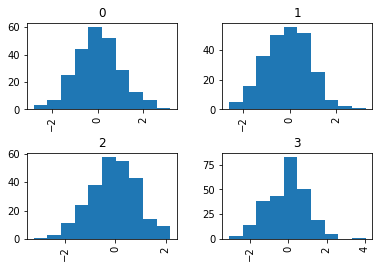

In [186]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))